# Imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
np.set_printoptions(threshold=np.inf)

# First Tests

In [73]:
directory = './samples/'

target_filenames = ['100.csv', '150.csv', '200.csv', '250.csv','280.csv', '300.csv', '350.csv', '400.csv']
x,y=[],[]
for filename in target_filenames:
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath):  # Check if the file exists
        f = pd.read_csv(filepath, delimiter='\t')
        x.append(f.drop(columns=['channel', 'experimental', 'smoothed', 'Au', '197Au']).values)
        y.append(int(filename.replace('.csv', '')))  # Extract the numeric value from the filename

print("X Data:")
for data in x:
    print(data)
print("\nY Labels:", y)

X Data:
[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [

[100 150 200 250 300 350 400 450 500]


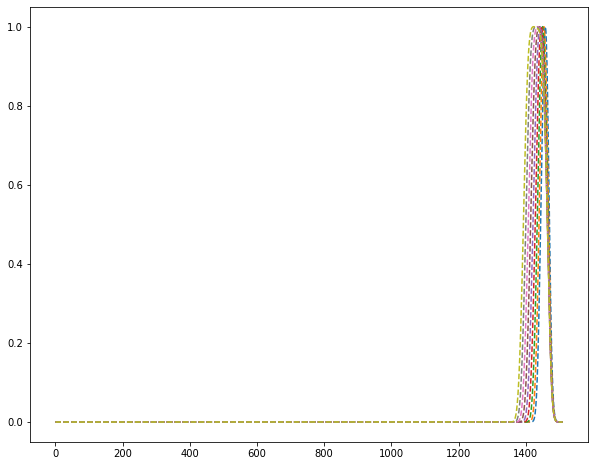

In [119]:
Xx = []
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X = np.array(Xx)
Y = np.array(y)
print(Y)

yaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(10, 8))
for i in X:
    plt.plot(yaxis,i,'--') 

plt.show()

In [75]:
x_train, x_test, labels_train, labels_test = train_test_split(X, Y, test_size = 1, random_state = 2)

print('Numero de espetros: '+ str(len(X)))
print('Numero de bins em cada espetro: '+str(len(X[0])))
print("Normalized test spectrum\n", x_test)
print('\n')
print("Label test\n", labels_test)

Numero de espetros: 8
Numero de bins em cada espetro: 1878
<class 'numpy.ndarray'>
Normalized test spectrum
 [[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00

# ANN to predict thickness of target

In [41]:
with open('data.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(len(float_values))
del x[len(x)-1]    

with open('labels.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)
    
print(x)
print(y)

[1894, 1879, 1879, 1894, 1879, 1894, 1879, 1894, 1894, 1879, 1879, 1879, 1894, 1879, 1894, 1894, 1879, 1879]
[[140.0, 631.7431819292499], [165.0, 609.5746804640229], [165.0, 646.3115774399058], [140.0, 598.7496049050453], [165.0, 601.0230482962046], [140.0, 617.7753019106958], [165.0, 639.1609230141682], [140.0, 623.8083819729369], [140.0, 644.8855795930992], [165.0, 649.0112607403686], [165.0, 610.3365602820694], [165.0, 636.9073732174592], [140.0, 591.5818363956793], [165.0, 606.7430795740067], [140.0, 565.5782357547924], [140.0, 550.4762055652288], [165.0, 605.3547509292091], [165.0, 573.1425034734546], []]


C:\Users\be_so\AppData\Local\Temp\ipykernel_10120\4021348233.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array(Xx)
C:\Users\be_so\AppData\Local\Temp\ipykernel_10120\4021348233.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array(y)


ValueError: x and y must have same first dimension, but have shapes (1881,) and (1894,)

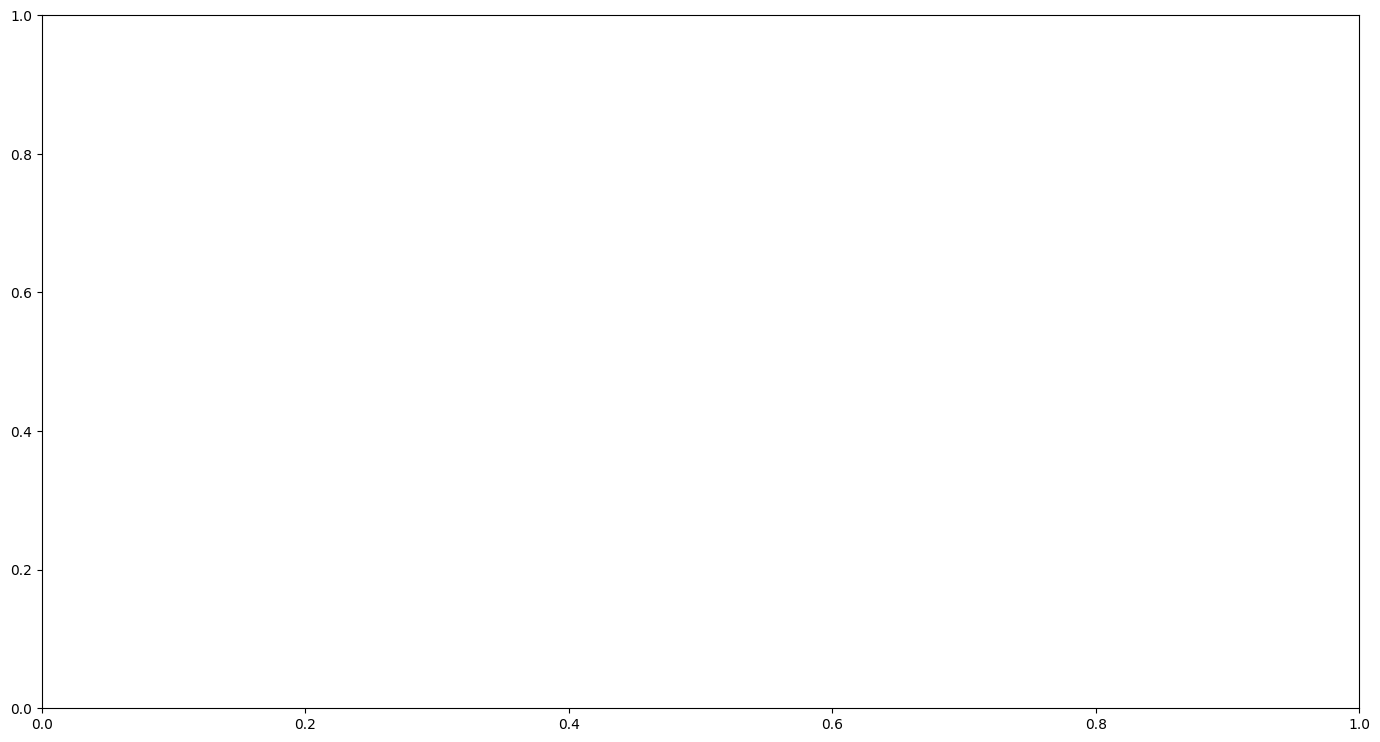

In [33]:
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)

Y=np.array(y)
xaxis=np.arange(len(X[1]))
fig = plt.figure(figsize =(17, 9))
for i in range(20):
    plt.plot(xaxis,X[i],'--')
plt.legend(Y[:25])
plt.title('First 20 Spectras of Ge with different thicknesses')
plt.show()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=1,random_state=6)

In [12]:
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(1879,)),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(20,activation='relu'),
     keras.layers.Dense(1,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               151200    
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 157291 (614.42 KB)
Trainable params: 157291 (614.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size)

Epoch 1/150
2/2 [==============================] - 1s 10ms/step - loss: 357813.3125 - mae: 597.5187
Epoch 2/150
2/2 [==============================] - 0s 5ms/step - loss: 357386.9375 - mae: 597.1638
Epoch 3/150
2/2 [==============================] - 0s 6ms/step - loss: 356900.4062 - mae: 596.7562
Epoch 4/150
2/2 [==============================] - 0s 5ms/step - loss: 356383.3750 - mae: 596.3230
Epoch 5/150
2/2 [==============================] - 0s 6ms/step - loss: 355685.0312 - mae: 595.7367
Epoch 6/150
2/2 [==============================] - 0s 6ms/step - loss: 354783.3125 - mae: 594.9831
Epoch 7/150
2/2 [==============================] - 0s 7ms/step - loss: 353722.0938 - mae: 594.0961
Epoch 8/150
2/2 [==============================] - 0s 10ms/step - loss: 352507.5938 - mae: 593.0696
Epoch 9/150
2/2 [==============================] - 0s 9ms/step - loss: 351122.6875 - mae: 591.9000
Epoch 10/150
2/2 [==============================] - 0s 8ms/step - loss: 349545.6250 - mae: 590.5732
Epoch 1

In [14]:
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

1/1 [==============================] - 0s 134ms/step - loss: 0.0946 - mae: 0.3075
Mean Absolute Error: 0.3074951171875


In [15]:
predictions=model.predict(X_test)
print('Prediction: ' + str(predictions[0][0]))
print('Real value: ' + str(y_test[0]))

1/1 [==============================] - 0s 91ms/step
Prediction: 608.70483
Real value: 609.012351260567
